In [74]:
import numpy as np
import pandas as pd

In [75]:
def generate_data(num_samples = 300):
    """
    Generate random XOR data with added noise.
    """
    X = np.random.randn(num_samples, 2)
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
    noise = np.random.normal(scale = 0.01, size = num_samples)
    X = np.concatenate((X, noise.reshape(-1, 1)), axis = 1)
    return X, y

In [76]:
X, y = generate_data()
y = y.astype(int)
pd.DataFrame(X).describe()

,0,1,2
count,300.000000,300.000000,300.000000
mean,-0.058382,-0.027409,-0.000721
std,0.987495,0.856354,0.010185
min,-2.561855,-2.553846,-0.029009
25%,-0.738051,-0.652835,-0.008049
50%,-0.085248,-0.051740,-0.000088
75%,0.571019,0.580852,0.005952
max,2.658673,2.140551,0.031021


In [77]:
len(np.unique(y))

2

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 123, stratify = y)
pd.DataFrame(X_train).describe()

,0,1,2
count,225.000000,225.000000,225.000000
mean,-0.083280,-0.006827,-0.000715
std,1.022912,0.846848,0.010545
min,-2.561855,-1.843596,-0.029009
25%,-0.775114,-0.644305,-0.008854
50%,-0.132606,-0.049637,-0.000071
75%,0.578894,0.597865,0.006445
max,2.658673,2.140551,0.024964


In [80]:
from matplotlib import pyplot as plt

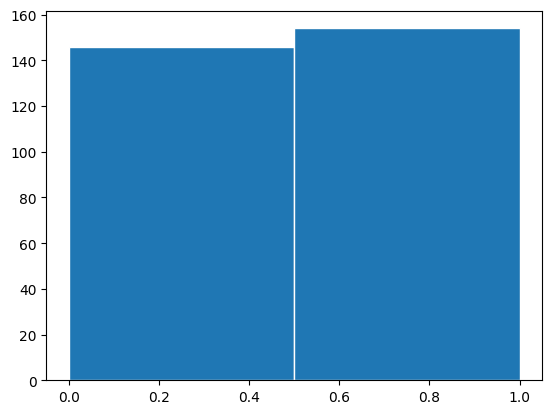

In [81]:
_ = plt.hist(y, edgecolor = 'white', bins = 2)

In [82]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [83]:
Counter(y_train) # SMOTE nije neophodan

Counter({np.int64(1): 116, np.int64(0): 109})

In [84]:
s = SMOTE(random_state = 123)

In [85]:
# X_train, y_train = s.fit_resample(X_train, y_train)

In [86]:
Counter(y_train)

Counter({np.int64(1): 116, np.int64(0): 109})

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
ss = StandardScaler()

In [89]:
ss.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [90]:
# X_train = ss.transform(X_train)
# X_test = ss.transform(X_test)
pd.DataFrame(X_train).describe()

,0,1,2
count,225.000000,225.000000,225.000000
mean,-0.083280,-0.006827,-0.000715
std,1.022912,0.846848,0.010545
min,-2.561855,-1.843596,-0.029009
25%,-0.775114,-0.644305,-0.008854
50%,-0.132606,-0.049637,-0.000071
75%,0.578894,0.597865,0.006445
max,2.658673,2.140551,0.024964


In [91]:
from sklearn.svm import SVC

In [92]:
svc = SVC(kernel = 'linear')

In [93]:
svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [95]:
pd.DataFrame(confusion_matrix(y_test, svc.predict(X_test)))

,0,1
0,16,21
1,2,36


In [96]:
accuracy_score(y_test, svc.predict(X_test))

0.6933333333333334

In [97]:
svc = SVC(kernel = 'rbf')

In [98]:
svc.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [99]:
pd.DataFrame(confusion_matrix(y_test, svc.predict(X_test)))

,0,1
0,34,3
1,3,35


In [100]:
accuracy_score(y_test, svc.predict(X_test))

0.92

In [101]:
from sklearn.decomposition import PCA

In [102]:
pca = PCA(n_components = 2)

In [103]:
pca.fit(X_train)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [104]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [105]:
pca.explained_variance_ratio_.sum()

np.float64(0.9999371145758791)

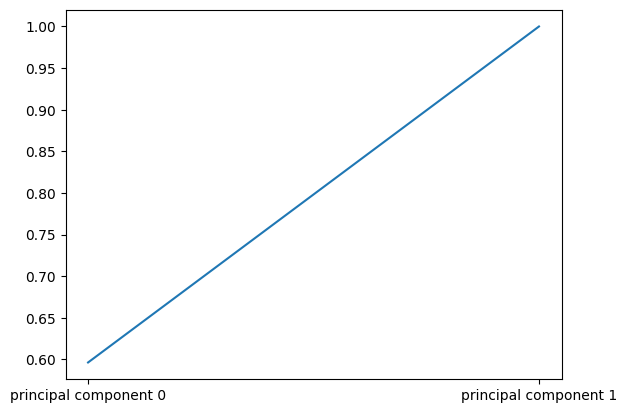

In [106]:
pca_names = [f'principal component {i}' for i in range(pca.n_components_)]
_ = plt.plot(pca_names, np.cumsum(pca.explained_variance_ratio_))

In [107]:
X = ss.fit_transform(X)
X = pca.fit_transform(X)

In [108]:
color = y_train
color[svc.support_] = 2

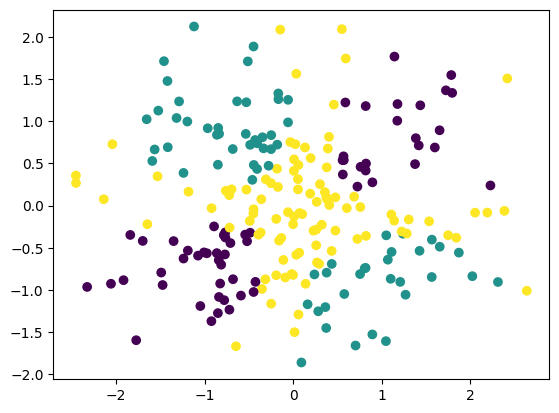

In [109]:
_ = plt.scatter(X_train[:, 0], X_train[:, 1], c = color)
plt.show()